In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

Importing relevant modules

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['axes.prop_cycle'] = cycler(color=['b','r', 'g', 'm','c'])
rc('text', usetex=True)
rc('font', family='serif')
rc('font', serif='times')
rc('mathtext', default='sf')
rc("lines", markeredgewidth=1)
rc("lines", linewidth=1)
rc('axes', labelsize=25)
rc("axes", linewidth=1)
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)
rc('legend', fontsize=20)
rc('ytick', right='True',direction= 'in')
rc('xtick', top='True',direction= 'in')
rc('xtick.major', pad=15)
rc('ytick.major', pad=15)
rc('xtick.major', size=12)
rc('ytick.major', size=12)
rc('xtick.minor', size=7)
rc('ytick.minor', size=7)

## Deriving the equations describing structure of homologous stars

Necessary equations for equilibrium:
\begin{align}
    \frac{dP(r)}{dr} & = -\frac{GM(r)\rho(r)}{r^2}\\
    \frac{dT(r)}{dr} & = -\frac{3}{4ac}\frac{\kappa\rho(r)}{T(r)^3}\frac{L(r)}{4\pi r^2}\\
    \frac{dL(r)}{dr} & =4\pi r^2\rho(r)\epsilon\\
\end{align}
Dividing the above equations by:
\begin{equation}
    \frac{dM(r)}{dr}=\rho(r)4\pi r^2
\end{equation}
we get:
\begin{align}
    \frac{dP}{dM_r} & = -\frac{GM_r}{4\pi r^4}\label{eq1}\\
    \frac{dT}{dM_r} & = -\frac{3\kappa}{64\pi^2 ac}\frac{1}{T^3}\frac{L_r}{r^4}\label{eq2}\\
    \frac{dL_r}{dM_r} & = \epsilon\label{eq3}
\end{align}
where $M_r\equiv M(r)$ and $L_r \equiv L(r)$. Thus, we now consider $M_r$ as the independent variable using the transformation:
\begin{equation}
    \frac{dr}{dM_r} = \frac{1}{\rho\, 4\pi r^2}\label{eq4}
\end{equation}

We now rescale our variables in terms of the dimensionless quantities $p,x,t\text{ and }l$, central pressure $P_c$, central temperature $T_c$ and scaling variables $M,R\text{ and }L$ as:
$$
P = P_c p, T=T_c t, r = Rx, L_r = Ll,M_r = Mm
$$
Additionally, we write:
$$
\rho = \rho_0P^aT^{-b},\kappa = \kappa_0\rho^nT^{-s},\epsilon=\epsilon_0\rho^\lambda T^\nu
$$
With these substitutions, the equations \eqref{eq1},\eqref{eq2},\eqref{eq3} and \eqref{eq4} then become:
\begin{align}
    \frac{P_cdp}{Mdm} &=-\frac{GMm}{4\pi R^4x^4}\implies\frac{dp}{dm}=-\left(\frac{GM^2}{4\pi R^4P_c}\right)\frac{m}{x^4}\label{eq11}\\
    \frac{T_cdt}{Mdm} &=-\frac{3\kappa L}{64\pi^2 acT_c^3R^4}\frac{l}{t^3x^4}\implies\frac{dt}{dm}=-\left(\frac{3\kappa_0\rho_0^nP_c^{an} LM}{64\pi^2 acT_c^{4+s+bn}R^4}\right)\frac{lp^{an}}{t^{3+s+bn}x^4}\label{eq22}\\
    \frac{Ldl}{Mdm}&=\epsilon_0\rho^\lambda T_c^\nu t^\nu\implies\frac{dl}{dm}=\left(\frac{\epsilon_0\rho_0^\lambda P_c^{a\lambda}T_c^{\nu-b\lambda}M}{L}\right)p^{a\lambda}t^{\nu-b\lambda}\label{eq33}\\
    \frac{Rdx}{Mdm}&=\frac{T_c^b}{4\pi\rho_0P_c^a R^2}\frac{t^b}{p^ax^2}\implies\frac{dx}{dm}=\left(\frac{MT_c^b}{4\pi\rho_0P_c^aR^3}\right)\frac{t^b}{p^ax^2}\label{eq44}
\end{align}
We choose
\begin{align}
    \frac{GM^2}{4\pi R^4P_c}&=1\label{c1}\\
    \frac{3\kappa_0\rho_0^nP_c^{an} LM}{64\pi^2 acT_c^{4+s+bn}R^4}&=1\label{c2}\\
    \frac{MT_c^b}{4\pi\rho_0P_c^aR^3}&=1\label{c3}
\end{align}
Using \eqref{c1}and\eqref{c2}, we get
$$
M = \frac{3\kappa_0\rho_0^nP_c^{an+1}L}{16\pi GacT_c^{4+s+bn}}
$$
Substituting this value of M in \eqref{eq33} and using the conditions \eqref{c1},\eqref{c2} and \eqref{c3}, we get the simplified ODEs as:

\begin{align} 
    \frac{dp}{dm} &= -\frac{m}{x^4}\\
    \frac{dx}{dm} &= \frac{t^b}{x^2p^a}\\
    \frac{dt}{dm} &=-\frac{p^{an}l}{x^4t^{3+s+bn}}\\
    \frac{dl}{dm} &=Ap^{a\lambda}t^{\nu-b\lambda}
\end{align}

where 
$$
A = \frac{3\kappa_0\epsilon_0\rho_0^{n+\lambda}}{16\pi Gac}\frac{P_c^{a(n+\lambda)+1}}{T_c^{4+s+b(n+\lambda)-\nu}}
$$


## Solving the dimensionless equations numerically

We now solve the set of differential equations assuming the following boundary conditions: 
$$
p(0)= t(0)=1, x(0) = l(0) = 0
$$
and the constants:
$$
a=b=1,n=s=0,\lambda=1,\nu=4
$$

In [3]:
def stellar_str(m,y,A,a,b,s,n,ll,nu):
    p,x,t,l = y
    dpdm = -m/(x**4)
    dxdm = t**b/(x*x*(p**a))
    dtdm = -p**(a*n)*l/((x**4)*(t**(3+s+b*n)))
    dldm = A*p**(a*ll)*t**(nu-b*ll)
    return [dpdm,dxdm,dtdm,dldm]

In [4]:
def term_cond(m,y,A,a,b,s,n,ll,nu):
    return y[2]
term_cond.terminal = True

In [5]:
sol = []
a,b,s,n,ll,nu = 1,1,0,0,1,4 #constants assuming ideal gas EOS, e-scattering opacity, p-p chain mechanism
#n,s = 1,3.5 #assuming Kramers opacity model
#nu = 18 #assuming CNO cycle mechanism
Avec = [0.534,0.538,0.54]
for A in Avec :
    sol.append(solve_ivp(stellar_str,[0, 15], [1,1e-18,1,0.], args=(A,a,b,s,n,ll,nu), method = 'BDF', dense_output=True,events=term_cond))

In [6]:
p,x,t,l,m = [],[],[],[],[]
for i in range(len(sol)):
    p.append(sol[i].y[0])
    x.append(sol[i].y[1])
    t.append(sol[i].y[2])
    l.append(sol[i].y[3])
    m.append(sol[i].t)

## Plotting the dimensionless stellar structure quantities

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


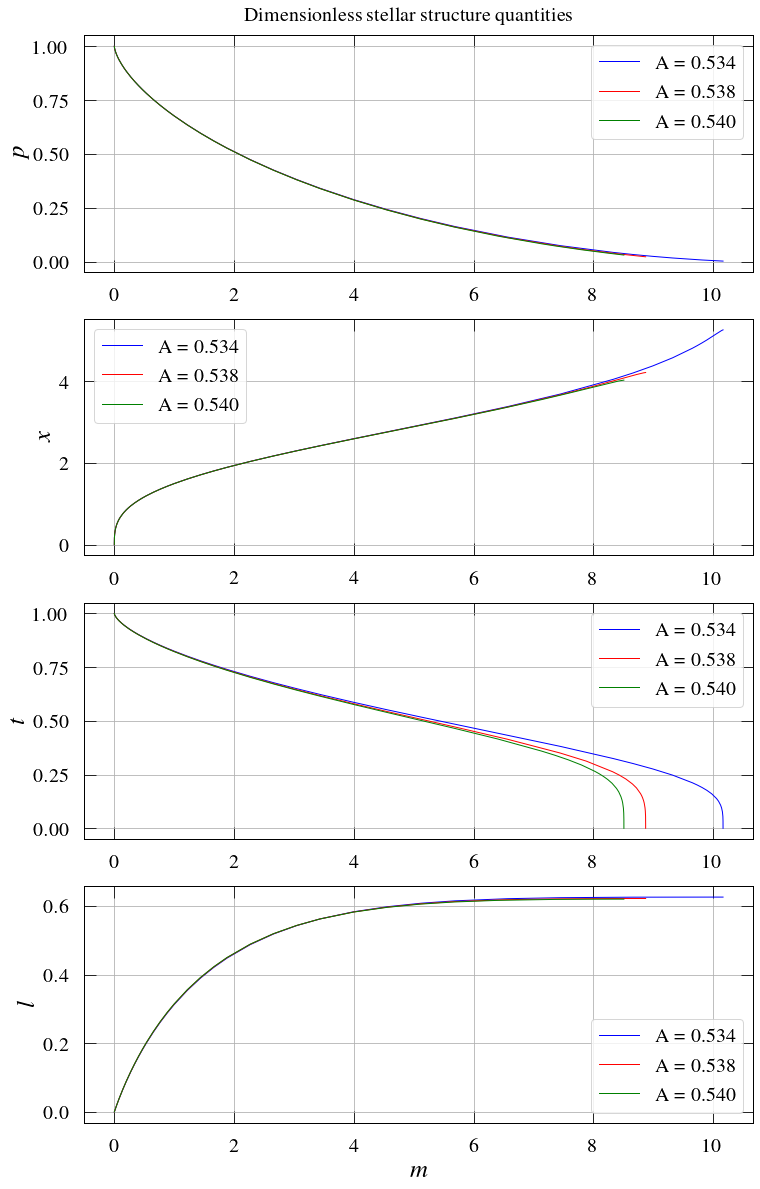

In [7]:
plt.figure(figsize = (12,20))
plt.suptitle('Dimensionless stellar structure quantities',size = 20,y=0.9)

plt.subplot(4,1,1)
for i in range(len(sol)):
    plt.plot(m[i],p[i],label='A = %3.3f'%Avec[i])
plt.ylabel(r'$p$')
plt.grid()
plt.legend()

plt.subplot(4,1,2)
for i in range(len(sol)):
    plt.plot(m[i],x[i],label='A = %3.3f'%Avec[i])
plt.ylabel(r'$x$')
plt.grid()
plt.legend()

plt.subplot(4,1,3)
for i in range(len(sol)):
    plt.plot(m[i],t[i],label='A = %3.3f'%Avec[i])
plt.ylabel(r'$t$')
plt.grid()
plt.legend()

plt.subplot(4,1,4)
for i in range(len(sol)):
    plt.plot(m[i],l[i],label='A = %3.3f'%Avec[i])
plt.ylabel(r'$l$')
plt.xlabel(r'$m$')
plt.grid()
plt.legend()

plt.show()

### Manually identifying the value of $m$ at which $p(m)$ goes to zero

In [9]:
As,ms,ps,xs,ts,ls = Avec[0],m[0][-1],p[0][-1],x[0][-1],t[0][-1],l[0][-1]
print('A* = %3.4f'%As)
print('m*= %3.4f'%ms)
print('p(m*) = %3.4f'%ps)
print('x(m*) = %3.4f'%xs)
print('t(m*) = %3.4f'%ts)
print('l(m*) = %3.4f'%ls)

A* = 0.5340
m*= 10.1635
p(m*) = 0.0039
x(m*) = 5.2605
t(m*) = 0.0001
l(m*) = 0.6255


## Plotting physical stellar structure quantities

By setting the value of $A_*$ and other relevant constants, we get
\begin{equation}
P_c = 4.89834\times 10^{21}\sqrt{A_*} \sqrt{T_c}
\end{equation}
which allows us to express $R,T_c $ and $L$ in terms of $M$ as:
\begin{align}
R &= 4.2441\times 10^{-7}A_*^{-1/7}M^{3/7}\\
T_c &= 1.11544\times 10^{-9}A_*^{1/7}M^{4/7}\\
L &=9.06448\times 10^{-49}M^3
\end{align}

In [10]:
Mstar = 1. #input mass of the star in units of solar mass

Rescaling the variables

In [11]:
Msun,Rsun,Lsun = 2e33,6.957e10,3.846e33
M = Mstar*Msun/ms
R = 4.2441e-7*pow(As,-1/7)*pow(M,3/7)
Tc = 1.11544e-9*pow(As,1/7)*pow(M,4/7)
L = 9.06448e-49*pow(M,3)
Pc = 4.89834e21*pow(Tc*As,0.5)

pnew=Pc*p[0]
rnew=R*x[0]/Rsun
tnew=Tc*t[0]
lnew=L*l[0]/Lsun
mnew=M*m[0]/Msun

#constructing the density profile
X = 0.75
mu = 0.5*pow(X,-0.57)
rr = 8.3e7
rho0=mu/rr
rho = []
for i in range(len(rnew)):
    rho.append(rho0*pnew[i]/tnew[i])

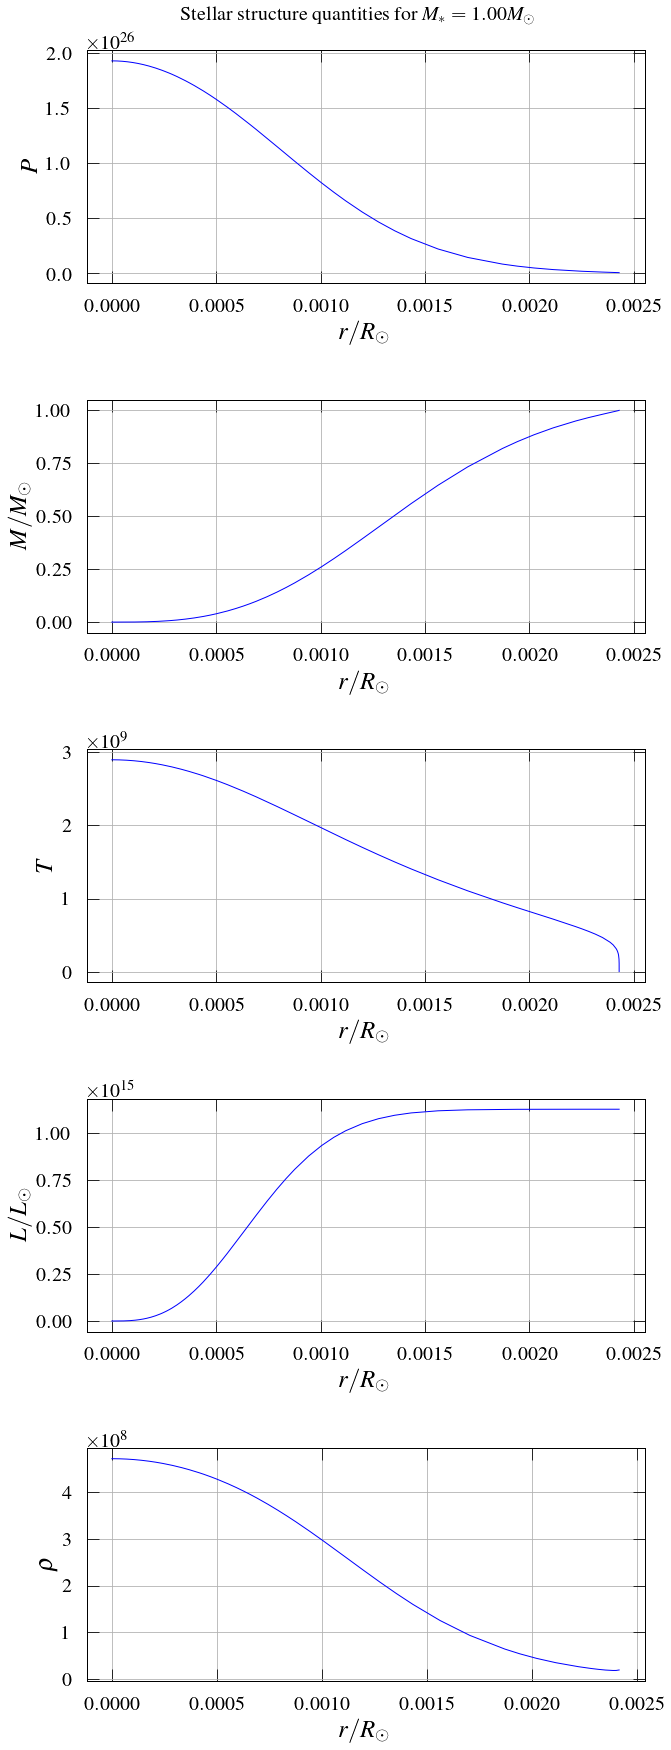

In [12]:
plt.figure(figsize=(10,30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(r'Stellar structure quantities for $M_*= %3.2f M_\odot$'%Mstar,size = 20,y=0.9)

plt.subplot(5,1,1)
plt.plot(rnew,pnew)
plt.ylabel(r'$P$')
plt.xlabel(r'$r/R_\odot$')
plt.grid()

plt.subplot(5,1,2)
plt.plot(rnew,mnew)
plt.ylabel(r'$M/M_\odot$')
plt.xlabel(r'$r/R_\odot$')
plt.grid()

plt.subplot(5,1,3)
plt.plot(rnew,tnew)
plt.ylabel(r'$T$')
plt.xlabel(r'$r/R_\odot$')
plt.grid()

plt.subplot(5,1,4)
plt.plot(rnew,lnew)
plt.ylabel(r'$L/L_\odot$')
plt.xlabel(r'$r/R_\odot$')
plt.grid()

plt.subplot(5,1,5)
plt.plot(rnew[45:-75],rho[45:-75])
plt.ylabel(r'$\rho$')
plt.grid()
plt.xlabel(r'$r/R_\odot$')
plt.show()


## Plotting $r_*, T_c, L_*$ as a function of $M_*$ 

In [13]:
M_vec = np.linspace(0.1,100,101)
Mfac = Msun/ms
Tc_vec,R_vec,L_vec = [],[],[]
for i in range(len(M_vec)):
    R_vec.append(4.2441e-7*pow(As,-1/7)*pow(M_vec[i]*Mfac,3/7)*xs/Rsun)
    Tc_vec.append(1.11544e-9*pow(As,1/7)*pow(M_vec[i]*Mfac,4/7))
    L_vec.append(9.06448e-49*pow(M_vec[i]*Mfac,3)*ls/Lsun)

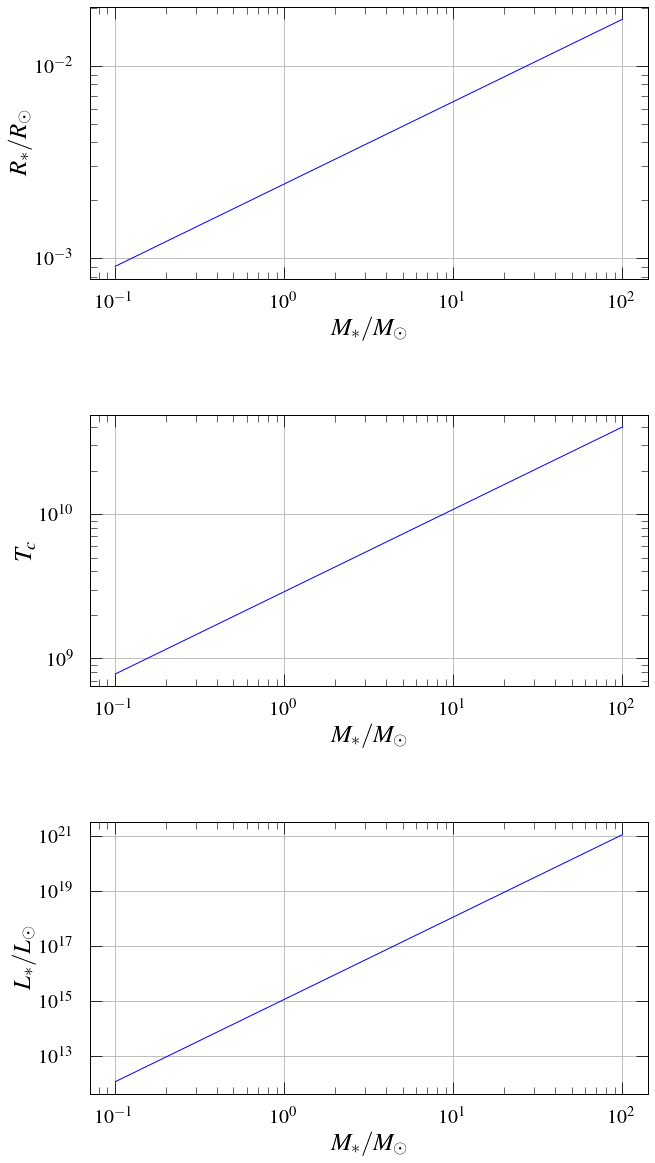

In [30]:
plt.figure(figsize=(10,20))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,1)
plt.loglog(M_vec,R_vec)
#plt.axvline(x = Mstar,linestyle='-.',c = 'r')
plt.ylabel(r'$R_*/R_\odot$')
plt.xlabel(r'$M_*/M_\odot$')
plt.grid()

plt.subplot(3,1,2)
plt.loglog(M_vec,Tc_vec)
#plt.axvline(x = Mstar,linestyle='-.',c = 'r')
plt.ylabel(r'$T_c$')
plt.xlabel(r'$M_*/M_\odot$')
plt.grid()

plt.subplot(3,1,3)
plt.loglog(M_vec,L_vec)
#plt.axvline(x = Mstar,linestyle='-.',c = 'r')
plt.ylabel(r'$L_*/L_\odot$')
plt.grid()
plt.xlabel(r'$M_*/M_\odot$')
plt.show()